![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import time


In [34]:
# Carregar as bases
X_train = pd.read_csv('/content/X_train.csv')
Y_train = pd.read_csv('/content/y_train.txt', header=None, names=['target'])
X_test = pd.read_csv('/content/X_test.csv')
Y_test = pd.read_csv('/content/y_test.txt', header=None, names=['target'])

print("Bases carregadas com sucesso!")


Bases carregadas com sucesso!


### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [35]:
# Utilizar as três variáveis mais importantes
top_3_features = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,24', 'angle(Y,gravityMean)']
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Modelo com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(X_train_top3, Y_train)
ccp_alphas = path.ccp_alphas

# Ajustando o modelo para cada valor de alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_top3, Y_train)
    clfs.append(clf)

# Exibindo os valores de ccp_alphas
print("Valores de ccp_alphas:", ccp_alphas)



Valores de ccp_alphas: [0.00000000e+00 5.22702041e-06 6.59906426e-06 7.22842411e-06
 8.46900856e-06 8.47900739e-06 9.06782735e-06 1.05466513e-05
 1.18466777e-05 1.19979754e-05 1.23872999e-05 2.26695684e-05
 2.62319291e-05 2.78669816e-05 3.35509612e-05 3.59633454e-05
 3.59639254e-05 3.63161869e-05 3.80591809e-05 4.17462240e-05
 4.37389319e-05 4.76060936e-05 4.87672178e-05 5.14693733e-05
 5.87197700e-05 5.98571391e-05 6.12078346e-05 6.34747914e-05
 7.11883329e-05 8.14946866e-05 9.33470655e-05 9.75054182e-05
 1.03992147e-04 1.12441059e-04 1.21239579e-04 1.28008023e-04
 1.29900225e-04 1.30576714e-04 1.48821476e-04 1.50404447e-04
 1.59571645e-04 1.79253862e-04 1.80577657e-04 1.93008801e-04
 2.03345272e-04 2.05436329e-04 2.05568421e-04 2.40183341e-04
 2.56666341e-04 2.72780659e-04 2.87265788e-04 2.87570095e-04
 3.09367581e-04 3.21574272e-04 3.57693404e-04 3.67851529e-04
 3.75297018e-04 4.10312152e-04 4.15307573e-04 4.15986122e-04
 4.19677650e-04 4.76627675e-04 4.88563049e-04 4.91508667e-04
 

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [36]:
# Modelo com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(X_train_top3, Y_train)
ccp_alphas = path.ccp_alphas[::10]  # Selecionar 1 a cada 10 valores de ccp_alpha

# Medir o tempo do procedimento
start_time = time.time()

# Grid Search com cross-validation k-fold (k=10)
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
grid_search = GridSearchCV(clf, param_grid={'ccp_alpha': ccp_alphas}, cv=10)
grid_search.fit(X_train_top3, Y_train)

end_time = time.time()

# Melhor valor de ccp_alpha
best_alpha = grid_search.best_params_['ccp_alpha']
print("Melhor valor de ccp_alpha:", best_alpha)

# Tempo total do procedimento
print("Tempo total do procedimento (em segundos):", end_time - start_time)


Melhor valor de ccp_alpha: 0.005345729106908115
Tempo total do procedimento (em segundos): 3.523226022720337


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia na base de testes: 0.7183576518493383


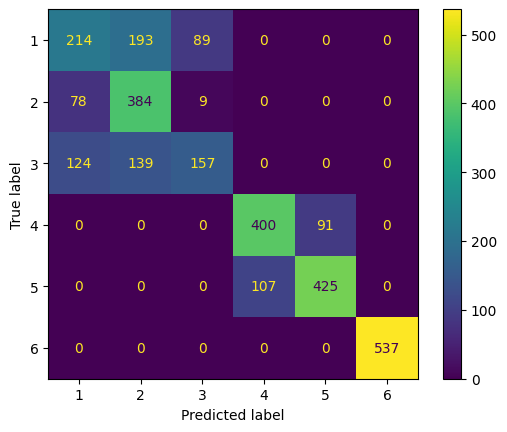

In [37]:
# Treinar a árvore com o melhor valor de ccp_alpha
best_ccp_alpha = 0.005345729106908115  # Valor encontrado anteriormente
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, ccp_alpha=best_ccp_alpha)
clf.fit(X_train_top3, Y_train)

# Calcular a acurácia na base de testes
Y_pred = clf.predict(X_test_top3)
accuracy = accuracy_score(Y_test, Y_pred)
print("Acurácia na base de testes:", accuracy)

# Visualizar a matriz de confusão
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()



### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [38]:
# Supondo que a classe de maior erro seja a classe 1
Y_train_binary = (Y_train['target'] == 1).astype(int)
Y_test_binary = (Y_test['target'] == 1).astype(int)

print("Variável binária criada com sucesso!")
print(Y_train_binary.head())


Variável binária criada com sucesso!
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [39]:
# Adicionar algumas variáveis adicionais
additional_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']  # Exemplo de variáveis adicionais
X_train_extended = X_train[top_3_features + additional_features]
X_test_extended = X_test[top_3_features + additional_features]


Acurácia na base de testes com variáveis adicionais: 0.7183576518493383


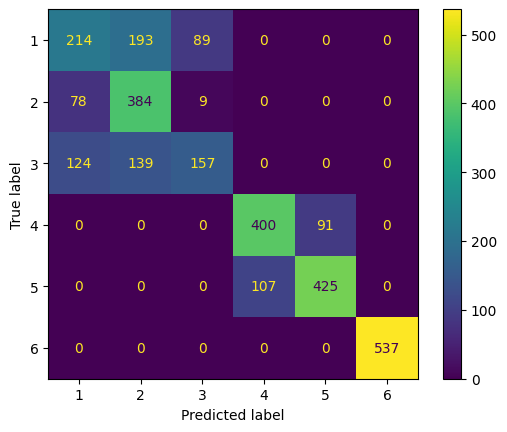

In [40]:
# Nova iteração com variáveis adicionais
clf_extended = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, ccp_alpha=best_ccp_alpha)
clf_extended.fit(X_train_extended, Y_train)

# Calcular a acurácia com variáveis adicionais
Y_pred_extended = clf_extended.predict(X_test_extended)
accuracy_extended = accuracy_score(Y_test, Y_pred_extended)
print("Acurácia na base de testes com variáveis adicionais:", accuracy_extended)

# Visualizar a nova matriz de confusão
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_extended)
plt.show()


Não entendi o porquê de duas acuracias distintas seguindo distindos métodos, então deixei as duas para que possam identificar porque há esta disparidade.

In [41]:
# Supondo que a classe de maior erro seja a classe 1
Y_train_binary = (Y_train['target'] == 1).astype(int)
Y_test_binary = (Y_test['target'] == 1).astype(int)

print("Variável binária criada com sucesso!")
print(Y_train_binary.head())


Variável binária criada com sucesso!
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [42]:
# Modelo com min_samples_leaf=20 e max_depth=4
clf_binary = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)
clf_binary.fit(X_train, Y_train_binary)

# Obter a importância das variáveis
feature_importances_binary = clf_binary.feature_importances_

# Criar um dataframe com a importância das variáveis
importances_df_binary = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances_binary})

# Ordenar as variáveis pela importância
importances_df_binary = importances_df_binary.sort_values(by='importance', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_features_binary = importances_df_binary.head(3)
print("As 3 variáveis mais importantes são:")
print(top_3_features_binary)


As 3 variáveis mais importantes são:
                       feature  importance
168      tBodyGyroJerk-mad()-X    0.352154
505          fBodyAccMag-std()    0.350738
67   tGravityAcc-arCoeff()-X,1    0.113027


Acurácia na base de testes com as novas variáveis: 0.6277570410587038


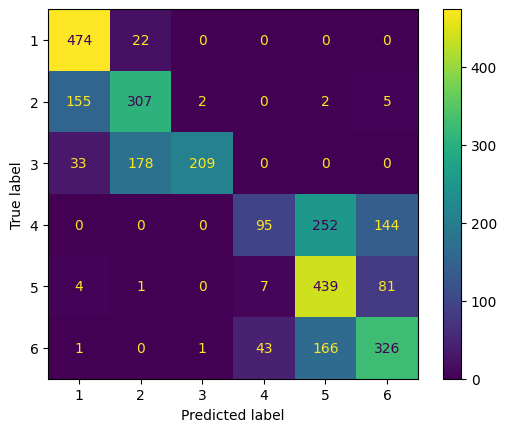

In [43]:
# Utilizar as três novas variáveis mais importantes
new_top_3_features = top_3_features_binary['feature'].tolist()
X_train_new_top3 = X_train[new_top_3_features]
X_test_new_top3 = X_test[new_top_3_features]

# Treinar a árvore com o melhor valor de ccp_alpha
best_ccp_alpha = 0.005345729106908115  # Valor encontrado anteriormente
clf_new_top3 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, ccp_alpha=best_ccp_alpha)
clf_new_top3.fit(X_train_new_top3, Y_train)

# Calcular a acurácia na base de testes
Y_pred_new_top3 = clf_new_top3.predict(X_test_new_top3)
accuracy_new_top3 = accuracy_score(Y_test, Y_pred_new_top3)
print("Acurácia na base de testes com as novas variáveis:", accuracy_new_top3)

# Visualizar a nova matriz de confusão
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_new_top3)
plt.show()
